<img src="https://explore-datascience.net/images/images_admissions2/main-logo.jpg">

<img src="https://ak.picdn.net/shutterstock/videos/29784268/thumb/12.jpg" width=600 height=100 />

<img src="https://image.slidesharecdn.com/attacksimulationhuntingmadeeasy-171204085132/95/attack-simulation-and-hunting-1-638.jpg?cb=1512377787" width=600 height=200 />

<a id="top"></a>
#  Classification Hackathon 
##### Kwanda Mazibuko <sup> </sup>

## Table of contents
1. [Introduction](#intro)
2. [Data Collection](#data)
3. [Data Preprocessing](#cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Feature Engineering and Feature Selection](#FEandFS)
6. [Modelling](#model)
7. [Model Evaluation](#evaluation)
8. [Hyperparameter Tuning](#evaluation)
9. [Conclusion](#conclusion) 

<a id="intro"></a>
## 1. Introduction

The Glasgow Climate Pact, adopted by almost 200 countries has raised an alarm and concerns that human activities have caused a rise of around 1.1°C of global warming to date. The impact is already being felt around the globe. These developments have been shared with the world through various media outlets. In recent years social media in particular Twitter has risen to be the prefered source of information. This has created a massive source of unstructured of data. This type of data contains a variety of topics and can be analysed to find the sentiment behind it.

### Problem Statement

The developments around global warming and the increase use of social media has forced companies to design products and services around lessen the impact on the environment and the sentiments expressed by their target market on social media platform.
Therefore it is important that methods such as sentimental analysis are explored to provide companies with solutions that can provide insights for future marketing strategies thus increasing company profit margins.

### Objectives
The key objective is to create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

### Literature Review

**Global warming**

Glaciers are melting, sea levels are rising, cloud forests are dying, and wildlife is scrambling to keep pace. It has become clear that humans have caused most of the past century's warming by releasing heat-trapping gases as we power our modern lives. Called greenhouse gases, their levels are higher now than at any time in the last 800,000 years.

We often call the result global warming, but it is causing a set of changes to the Earth's climate, or long-term weather patterns, that varies from place to place. While many people think of global warming and climate change as synonyms, scientists use “climate change” when describing the complex shifts now affecting our planet’s weather and climate systems—in part because some areas actually get cooler in the short term.

Climate change encompasses not only rising average temperatures but also extreme weather events, shifting wildlife populations and habitats, rising seas, and a range of other impacts. All of those changes are emerging as humans continue to add heat-trapping greenhouse gases to the atmosphere, changing the rhythms of climate that all living things have come to rely on.

What will we do—what can we do—to slow this human-caused warming? How will we cope with the changes we've already set into motion? While we struggle to figure it all out, the fate of the Earth as we know it—coasts, forests, farms, and snow-capped mountains—hangs in the balance.

**Social media and public opinion**

About two-thirds of Americans (64%) say social media have a mostly negative effect on the way things are going in the country today, according to a Pew Research Center survey of U.S. adults conducted July 13-19, 2020. Just one-in-ten Americans say social media sites have a mostly positive effect on the way things are going, and one-quarter say these platforms have a neither positive nor negative effect.

Mass media and social media can also affirm latent attitudes and “activate” them, prompting people to take action. Just before an election, for example, voters who earlier had only a mild preference for one party or candidate may be inspired by media coverage not only to take the trouble to vote but perhaps also to contribute money or to help a party organization in some other way.

This means that people can be agitated to take any action with regards to whatever it is that they feel should be addressed, whether that means boycotting the products. In this case, offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

<a id="data"></a>
## 2. Data Collection

Data collection is the process of gathering and measuring information on variables of interest, in an established systematic fashion that enables one to answer stated questions, test hypotheses, and evaluate outcomes. We don't need to collect data because it has been provided to us with different classes.

#### Class Description 

- afr - Afrikaans
- eng - English
- nbl - isiNdebele
- nso - Sepedi
- sot - Sesotho
- ssw - siSwati
- tsn - Setswana
- tso - Xitsonga
- ven - Tshivenda
- xho - isiXhosa
- zul - isiZulu

In [2]:
!pip install comet_ml
!pip install unidecode
!pip install unicode
!pip install wordcloud

In [3]:
# Data manipulation
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
import unidecode
import unicodedata
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import word_tokenize, pos_tag, pos_tag_sents
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
# For searching patterns on the tweets (regex)
import re
# datetime
import datetime

# Libraries for data preparation and model building
from sklearn.pipeline import Pipeline
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import boxcox, zscore
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures

# visualizations
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# saving my model
import pickle

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thaba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thaba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\thaba\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thaba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# Read data
df_test = pd.read_csv('https://raw.githubusercontent.com/kwanda2426/Classification-Hackathon/main/Data/test_set.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/kwanda2426/Classification-Hackathon/main/Data/train_set.csv')
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [5]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


### Data Overview

**Train dataset**

In [ ]:
# Checking how our training dataset looks like
print("Rows    : ", df_train.shape[0])

print("Columns : ", df_train.shape[1])

print("\nMissing values: ", df_train.isnull().sum().values.sum())

print("\nInformation about the data: ")
print("  \n", df_train.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in df_train.columns:
    unique_out = len(df_train[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  15819
Columns :  3

Missing values:  0

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB
  
 None

About the data: 

Feature 'sentiment' has 4 unique categories
Feature 'message' has 14229 unique categories
Feature 'tweetid' has 15819 unique categories


**Test dataset**

In [ ]:
# Checking how our data looks like
print("Rows    : ", df_test.shape[0])

print("Columns : ", df_test.shape[1])

print("\nMissing values: ", df_test.isnull().sum().values.sum())

print("\nInformation about the data: ")
print("  \n", df_test.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in df_test.columns:
    unique_out = len(df_test[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  10546
Columns :  2

Missing values:  0

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB
  
 None

About the data: 

Feature 'message' has 9575 unique categories
Feature 'tweetid' has 10546 unique categories


<a id="cleaning"></a>
## 3. Data Preprocessing

Data preprocessing is a technique that involves taking in raw data and transforming it into a understable format. The technique includes data cleaning, intergration, transformation, reduction and discretization. The data preprocessing plan will include the following processes:

- **Extraction process**

- **Data cleaning**



### Extraction Process 

The extraction process is performed to gain an accurate and deep understanding into the data when performing data analysis and is performed prior to data cleaning to ensure that information is not lost.

The extraction process will include:
- Convert text to lowercase
- Extract hashtags and store then in a seperate dataframe
- Extract mentions and create a mentions column
- Group mentions based on sentiment
- Extract urls and create a urls column
- Group urls based on sentiment

#### Convert text to lowercase

In [ ]:
def lowercase(text):
    text = text.lower() # making text to be lowercase
    return text

df_train['message'] = df_train['message'].apply(lowercase)

df_test['message'] = df_test['message'].apply(lowercase)

### Data Cleaning 

Data cleaning is a process of improving the quality of the data by identifying corrupt or erroneous records from a data set and rectifying them.

The data cleaning process will include the following:
- Contractions
- Removal of the noise:
    - urls,
    - hashtags,
    - mentions,
    - punctuations
- Tokenization
- Lemmatization

#### Contractions

In [ ]:
#Function used to lookup shortwords from the dictionary
def lookup_dict(text, dictionary):
    
    for word in text.split(): 
        
        if word.lower() in dictionary:
            
            if word.lower() in text.split():
                
                text = text.replace(word, dictionary[word.lower()]) 
    return text

#### Removal of noise


Data that can not be processed/interpreted by a machine is classified as noisy data. Text data contains a lot of noise, this comes in a  form of special characters such as hashtags, punctuation and numbers. During this process the data will be changed from accent letters to normal letters and the noise will be removed.

In [ ]:
# Changing accent letter to normals letters
def strip_accents(text):
    """This function is to strip accent letter those special characters then return a normal alphabet"""
    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

# applying the function on our training data
df_train['clean_message'] = df_train['message'].apply(strip_accents) 

# applying the function on our testing data
df_test['clean_message'] = df_test['message'].apply(strip_accents)


# Cleaning the messages by removing urls, making messages to be lowercase,removing all punctuations and extra whitespaces 
def clean_text(text):
    """This function is to clean the data removing urls, punctuations, spaces and making text to be lowercase """
    
    URL = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    text = re.sub(URL, '', text)
    
    text = re.sub("it's", "it is", text) 
      
    text = re.sub("(\#)|(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})", "", text) # removing all punctuation with no space
    
    text = re.sub("(<br\s/><br\s/?)|(-)|(_)|(/)|(:).", " ", text) # removing all punctuation with a space
    
    text = re.sub(r'[0-9]', '', text) # removing numbers from strings
    
    text = re.sub("\\s+", " ", text)  # Remove extra whitespace
       
    text = re.sub(r"U+FFFD ", ' ', text) # Remove that funny diamond
    
    text = text.lstrip()  # removes whitespaces before string
    
    text = text.rstrip()  # removes whitespaces after string
    
    return text

df_train['clean_message'] = df_train['clean_message'].apply(clean_text)

df_test['clean_message'] = df_test['clean_message'].apply(clean_text)


#Removing RT ftom tweets
df_train['clean_message'] = df_train['clean_message'].str.strip('rt')

df_test['clean_message'] = df_test['clean_message'].str.strip('rt')


# Remove @ mentions
pattern = r"@[\w]+" # pattern to remove
sub = r'' # replace it with with an empty space 

#transforming our dataframe 
df_train['clean_message'] = df_train['clean_message'].replace(to_replace = pattern, value = sub, regex = True)

#transforming our dataframe 
df_test['clean_message'] = df_test['clean_message'].replace(to_replace = pattern, value = sub, regex = True) 

df_train

,sentiment,message,tweetid,mentions,urls,clean_message,tokenized,POS,lemmatized,num_words,word_cloud,word
0,1,polyscimajor epa chief doesn't think carbon di...,625221,[mashable],[https://t.co/yelvcefxkc],polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesnt think carbon dio...,17,polyscimajor epa chief doesnt think carbon dio...,polyscimajor epa chief doesnt think carbon dio...
1,1,it's not like we lack evidence of anthropogeni...,126103,[],[],it is not like we lack evidence of anthropogen...,"[it, is, not, like, we, lack, evidence, of, an...","[(it, n), (is, v), (not, r), (like, n), (we, n...",it be not like we lack evidence of anthropogen...,11,it be not like we lack evidence of anthropogenic,like lack evidence anthropogenic
2,2,rt @rawstory: researchers say we have three ye...,698562,[rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt]",researchers say we have three years to act o...,"[researchers, say, we, have, three, years, to,...","[(researchers, n), (say, v), (we, n), (have, v...",researcher say we have three year to act on cl...,15,researcher say we have three year to act on be...,researcher say three year act late
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,[],[https://t.co/44wotxtlcd],odayinmaker wired was a pivotal year in the wa...,"[odayinmaker, wired, was, a, pivotal, year, in...","[(odayinmaker, n), (wired, v), (was, v), (a, n...",odayinmaker wire be a pivotal year in the war ...,12,odayinmaker wire be pivotal year in the war on,odayinmaker wire pivotal year war
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,[soynoviodetodas],[],it is and a racist sexist climate change den...,"[it, is, and, a, racist, sexist, climate, chan...","[(it, n), (is, v), (and, n), (a, n), (racist, ...",it be and a racist sexist climate change deny ...,16,it be and racist sexist deny bigot be lead in ...,racist sexist deny bigot lead poll electionnigh
...,...,...,...,...,...,...,...,...,...,...,...,...
15814,1,rt @ezlusztig: they took down the material on ...,22001,[ezlusztig],[],they took down the material on global warmin...,"[they, took, down, the, material, on, global, ...","[(they, n), (took, v), (down, r), (the, n), (m...",they take down the material on global warm lgb...,20,they take down the material on warm lgbt right...,take material warm lgbt right health care they...
15815,2,rt @washingtonpost: how climate change could b...,17856,[washingtonpost],[https://t.co/rpfgvb2plq],how climate change could be breaking up a mi...,"[how, climate, change, could, be, breaking, up...","[(how, n), (climate, a), (change, n), (could, ...",how climate change could be break up a million...,12,how could be break up million year old relatio...,could break million year old relationship
15816,0,notiven: rt: nytimesworld :what does trump act...,384248,[],[https://t.co/0mp2],notiven rt nytimesworld what does trump actual...,"[notiven, rt, nytimesworld, what, does, trump,...","[(notiven, r), (rt, v), (nytimesworld, r), (wh...",notiven rt nytimesworld what do trump actually...,17,notiven nytimesworld what do actually believe ...,notiven nytimesworld actually believe rick per...
15817,-1,rt @sara8smiles: hey liberals the climate chan...,819732,[sara8smiles],[],hey liberals the climate change crap is a ho...,"[hey, liberals, the, climate, change, crap, is...","[(hey, n), (liberals, v), (the, n), (climate, ...",hey liberals the climate change crap be a hoax...,19,hey liberals the crap be hoax that tie to agen...,hey liberals crap hoax tie agenda byaaa


#### Tokenization

Tokenization is a process of breaking down unstructured data and natural language text into smaller units called tokens. During this process we will first tokenize the tweets and then transform the data using the TreebankWord.

In [ ]:
#start by tokenizing the tweets
tokeniser = TreebankWordTokenizer()

# transforming the data using the Treebankword tokenizer
df_train['tokenized'] = df_train['clean_message'].apply(tokeniser.tokenize)

df_train

,sentiment,message,tweetid,mentions,urls,clean_message,tokenized,POS,lemmatized,num_words,word_cloud,word
0,1,polyscimajor epa chief doesn't think carbon di...,625221,[mashable],[https://t.co/yelvcefxkc],polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesnt think carbon dio...,17,polyscimajor epa chief doesnt think carbon dio...,polyscimajor epa chief doesnt think carbon dio...
1,1,it's not like we lack evidence of anthropogeni...,126103,[],[],it is not like we lack evidence of anthropogen...,"[it, is, not, like, we, lack, evidence, of, an...","[(it, n), (is, v), (not, r), (like, n), (we, n...",it be not like we lack evidence of anthropogen...,11,it be not like we lack evidence of anthropogenic,like lack evidence anthropogenic
2,2,rt @rawstory: researchers say we have three ye...,698562,[rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt]",researchers say we have three years to act o...,"[researchers, say, we, have, three, years, to,...","[(researchers, n), (say, v), (we, n), (have, v...",researcher say we have three year to act on cl...,15,researcher say we have three year to act on be...,researcher say three year act late
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,[],[https://t.co/44wotxtlcd],odayinmaker wired was a pivotal year in the wa...,"[odayinmaker, wired, was, a, pivotal, year, in...","[(odayinmaker, n), (wired, v), (was, v), (a, n...",odayinmaker wire be a pivotal year in the war ...,12,odayinmaker wire be pivotal year in the war on,odayinmaker wire pivotal year war
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,[soynoviodetodas],[],it is and a racist sexist climate change den...,"[it, is, and, a, racist, sexist, climate, chan...","[(it, n), (is, v), (and, n), (a, n), (racist, ...",it be and a racist sexist climate change deny ...,16,it be and racist sexist deny bigot be lead in ...,racist sexist deny bigot lead poll electionnigh
...,...,...,...,...,...,...,...,...,...,...,...,...
15814,1,rt @ezlusztig: they took down the material on ...,22001,[ezlusztig],[],they took down the material on global warmin...,"[they, took, down, the, material, on, global, ...","[(they, n), (took, v), (down, r), (the, n), (m...",they take down the material on global warm lgb...,20,they take down the material on warm lgbt right...,take material warm lgbt right health care they...
15815,2,rt @washingtonpost: how climate change could b...,17856,[washingtonpost],[https://t.co/rpfgvb2plq],how climate change could be breaking up a mi...,"[how, climate, change, could, be, breaking, up...","[(how, n), (climate, a), (change, n), (could, ...",how climate change could be break up a million...,12,how could be break up million year old relatio...,could break million year old relationship
15816,0,notiven: rt: nytimesworld :what does trump act...,384248,[],[https://t.co/0mp2],notiven rt nytimesworld what does trump actual...,"[notiven, rt, nytimesworld, what, does, trump,...","[(notiven, r), (rt, v), (nytimesworld, r), (wh...",notiven rt nytimesworld what do trump actually...,17,notiven nytimesworld what do actually believe ...,notiven nytimesworld actually believe rick per...
15817,-1,rt @sara8smiles: hey liberals the climate chan...,819732,[sara8smiles],[],hey liberals the climate change crap is a ho...,"[hey, liberals, the, climate, change, crap, is...","[(hey, n), (liberals, v), (the, n), (climate, ...",hey liberals the climate change crap be a hoax...,19,hey liberals the crap be hoax that tie to agen...,hey liberals crap hoax tie agenda byaaa


#### Lemmatization

Lemmatization is a process of converting/reducing a word to it meaningful root/base. During this process we will first change the column clean_message into a list, tagging the tweets and performing POS tagging.

In [ ]:
# converting the column clean_message in the dataframe into a list
texts = df_train['clean_message'].tolist()

# tagging the tweets
tagged_texts = pos_tag_sents(map(word_tokenize, texts))

df_train['POS'] = tagged_texts

""" this function indentifies the parts of speech Noun, Adjective, Verb and Adverb """
def get_wordnet_pos(tag):
    
    if tag.startswith('J'):
        return wordnet.ADJ

    elif tag.startswith('V'):
        return wordnet.VERB

    elif tag.startswith('N'):
        return wordnet.NOUN

    elif tag.startswith('R'):
        return wordnet.ADV
    
    else:
        return wordnet.NOUN

# transforming the data with the function we created
df_train['POS'] = df_train['POS'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])



# Initialising our lemmatizer
lemmatizer = WordNetLemmatizer()

# applying lemmatization to the POS column
df_train['lemmatized'] = df_train['POS'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])

# joining the tokenised words after they have been lemmatized
df_train['lemmatized'] = [' '.join(map(str, l)) for l in df_train['lemmatized']]

df_train


,sentiment,message,tweetid,mentions,urls,clean_message,tokenized,POS,lemmatized,num_words,word_cloud,word
0,1,polyscimajor epa chief doesn't think carbon di...,625221,[mashable],[https://t.co/yelvcefxkc],polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesnt think carbon dio...,17,polyscimajor epa chief doesnt think carbon dio...,polyscimajor epa chief doesnt think carbon dio...
1,1,it's not like we lack evidence of anthropogeni...,126103,[],[],it is not like we lack evidence of anthropogen...,"[it, is, not, like, we, lack, evidence, of, an...","[(it, n), (is, v), (not, r), (like, n), (we, n...",it be not like we lack evidence of anthropogen...,11,it be not like we lack evidence of anthropogenic,like lack evidence anthropogenic
2,2,rt @rawstory: researchers say we have three ye...,698562,[rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt]",researchers say we have three years to act o...,"[researchers, say, we, have, three, years, to,...","[(researchers, n), (say, v), (we, n), (have, v...",researcher say we have three year to act on cl...,15,researcher say we have three year to act on be...,researcher say three year act late
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,[],[https://t.co/44wotxtlcd],odayinmaker wired was a pivotal year in the wa...,"[odayinmaker, wired, was, a, pivotal, year, in...","[(odayinmaker, n), (wired, v), (was, v), (a, n...",odayinmaker wire be a pivotal year in the war ...,12,odayinmaker wire be pivotal year in the war on,odayinmaker wire pivotal year war
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,[soynoviodetodas],[],it is and a racist sexist climate change den...,"[it, is, and, a, racist, sexist, climate, chan...","[(it, n), (is, v), (and, n), (a, n), (racist, ...",it be and a racist sexist climate change deny ...,16,it be and racist sexist deny bigot be lead in ...,racist sexist deny bigot lead poll electionnigh
...,...,...,...,...,...,...,...,...,...,...,...,...
15814,1,rt @ezlusztig: they took down the material on ...,22001,[ezlusztig],[],they took down the material on global warmin...,"[they, took, down, the, material, on, global, ...","[(they, n), (took, v), (down, r), (the, n), (m...",they take down the material on global warm lgb...,20,they take down the material on warm lgbt right...,take material warm lgbt right health care they...
15815,2,rt @washingtonpost: how climate change could b...,17856,[washingtonpost],[https://t.co/rpfgvb2plq],how climate change could be breaking up a mi...,"[how, climate, change, could, be, breaking, up...","[(how, n), (climate, a), (change, n), (could, ...",how climate change could be break up a million...,12,how could be break up million year old relatio...,could break million year old relationship
15816,0,notiven: rt: nytimesworld :what does trump act...,384248,[],[https://t.co/0mp2],notiven rt nytimesworld what does trump actual...,"[notiven, rt, nytimesworld, what, does, trump,...","[(notiven, r), (rt, v), (nytimesworld, r), (wh...",notiven rt nytimesworld what do trump actually...,17,notiven nytimesworld what do actually believe ...,notiven nytimesworld actually believe rick per...
15817,-1,rt @sara8smiles: hey liberals the climate chan...,819732,[sara8smiles],[],hey liberals the climate change crap is a ho...,"[hey, liberals, the, climate, change, crap, is...","[(hey, n), (liberals, v), (the, n), (climate, ...",hey liberals the climate change crap be a hoax...,19,hey liberals the crap be hoax that tie to agen...,hey liberals crap hoax tie agenda byaaa


<a id="EDA"></a>
## 4. Exploratory Data Analysis

During the exploratory data analysis process we will be looking into gaining ana accurate and deep understanding of the dataset. We will achieve this by performing the following processes:

- Sentiment distribution
- Tweet length distribution
- Hashtag analysis
- Frequently words from each sentiment
- Other frequent words without common words
- Mentions analysis
- Representation of mentions on wordcloud

### Sentiment Distribution

Based on the plot below we observe that sentiment distribution is disproportional with the pro climate change class taking up a large portion of the data.

In [ ]:
# labels
lab =["Pro","News","Neutral","Anti"]
# values
val = df_train.sentiment.value_counts().values.tolist()
# create pie chart
fig = px.pie(df_train, 
             values = val,
             names = lab,
             title = "Sentiment distribution in data",
             hole = .5
            )
# update traces
fig.update_traces(
            textposition = "inside",
            textinfo = "percent +label")
# update layout
fig.update_layout(
    title_font_size = 22,
    plot_bgcolor = "rgb(243,243,243)",
    paper_bgcolor= "rgb(243,243,243)")

### Tweet length distribution

#### Length of characters in each tweet per sentiment boxplots

From the boxplots below we observed that tweets that fall under the news climate change class have the lowest length of characters per tweet, followed by the pro climate change class that has a cluster of outliers below the lower whisker. The neutral climate change class have the highest length of characters per tweet.

In [ ]:
# Finding Number of Words per Tweet from the lemmatized words
df_train["num_words"] = df_train["lemmatized"].apply(lambda x: len(str(x).split()))


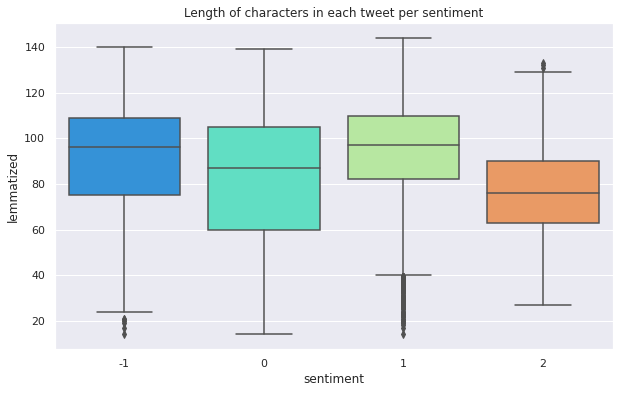

In [ ]:
# Boxplot for the number of characters in each tweet
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# plotting boxplot for the length of how long each tweet is per sentiment 
sns.boxplot(x=df_train['sentiment'], y=df_train['lemmatized'].str.len(), data=df_train, palette=("rainbow"), ax=ax)

# title of the boxplot
plt.title('Length of characters in each tweet per sentiment')

# showing the plot
plt.show()

#### Number of words in each tweet for each sentiment boxplots

From the boxplots below we observed that tweets that fall under the news climate change class have the lowest number of words per tweet and the tweets are more compact compared to other classes. The neutral climate change class have generally the highest number of words per tweet.

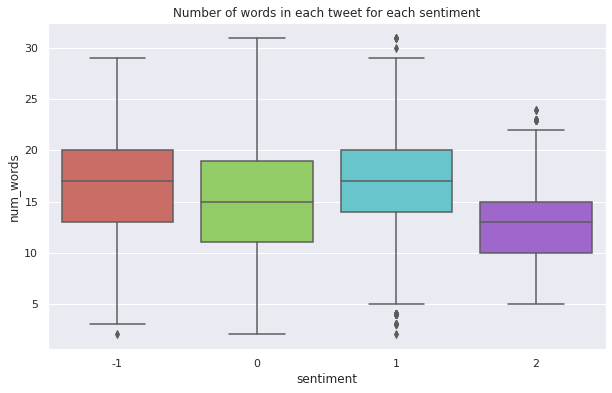

In [ ]:
#Boxplot for number of words in each tweet
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# plotting boxplot for the length of how long each tweet is per sentiment 
sns.boxplot(x='sentiment', y='num_words', data=df_train, palette=("hls"))

# title of the boxplot
plt.title('Number of words in each tweet for each sentiment')

# showing the plot
plt.show()

### Hashtag analysis

### Frequent words from each sentiment

### Other frequent words without common words

Text(0.5, 1.0, 'WORD FREQUENCY')

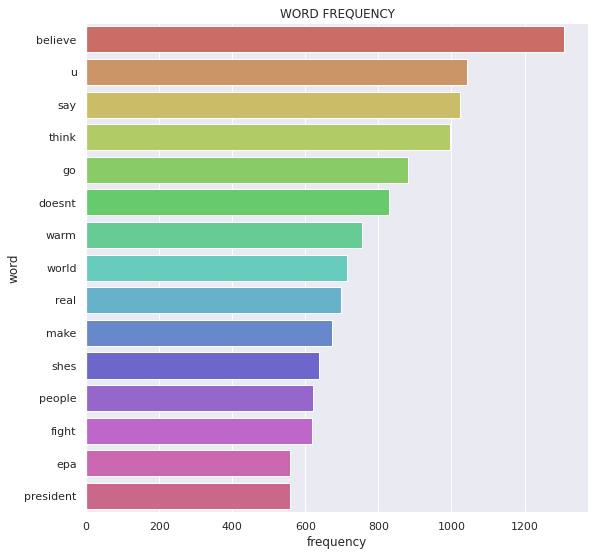

In [ ]:
# Removing words that has no relevance to the context (https, RT, CO)
df_train['word_cloud'] = df_train['lemmatized'].str.replace('http\S+|www.\S+', '', case=False)

# Removing common words which appear in all sentiments
remove_words = ['climate', 'change', 'rt', 'global', 'warming', 'donald', 'trump','amp', 'realDonaldTrump', 's','aaa', 'a']

# Function to remove common words listed above
def remove_common_words(message):
    pattern = re.compile(r'\b(' + r'|'.join(remove_words) + r')\b\s*')
    message = pattern.sub('', message)
    return message

df_train['word_cloud'] = df_train['word_cloud'].apply(remove_common_words)


# Adding select words to stop words for better analysis on important word frequency
stop = set(stopwords.words('english')) 
stop_words = ["via", "co", "I",'We','The'] + list(stop)

# Removing stop words from the tweets
df_train['word'] = df_train['word_cloud'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
df_train['word'] = df_train['word'].str.replace(r'[^\w\s]+', '')

# Separating the strings to a list of words
word_list = [word for line in df_train['word'] for word in line.split()]

# Creating a word frequency counter
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(15)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

# Creating a word frequency plot
fig, ax = plt.subplots(figsize = (9, 9))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df, palette="hls")
plt.title('WORD FREQUENCY')
#plt.savefig('wordcount_bar.png')


#### Observations
​
- The words **believe, warm, world** and **real** are words that will most likely be used by the pro climate chage class to express their beliefs and reality of climate change. There is also EPA (United States Environmental Protection Agency), whose mission is to protect humans and  environment health.This brings us to the conclusion that the top frequent words are more aligned with the the pro climate change class

### Mentions analysis

###  Representations of mentions on a wordclouds

<a id="model"></a>
## 5. Model Building

The process of training an ML model involves providing an ML algorithm (that is, the learning algorithm) with training data to learn from. The term ML model refers to the model artifact that is created by the training process.

The training data must contain the correct answer, which is known as a target or target attribute. The learning algorithm finds patterns in the training data that map the input data attributes to the target (the answer that you want to predict), and it outputs an ML model that captures these patterns.
We train different models on the training data.

In [ ]:
# extract data for training and validation

X = df_train.clean_message.values # predictor variable


y = df_train.sentiment.values # target variable

Data is randomly split into training and validation data sets. 75% is for training the model and 25% is reserved for validation. 

- **The training** set is a subset of the dataset to build predictive models.

- **The validation** set is a subset of the dataset to assess the performance of the model built in the training phase. It provides a test platform for fine-tuning model’s parameters and selecting the best-performing model.

- **Test** set or unseen examples is a subset of the dataset to assess the likely future performance of a model. If a model fit to the training set much better than it fits the test set, overfitting is probably the cause.

In [ ]:
# split data for training and validation

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                   random_state = 42,
                                                   test_size = 0.25,
                                                   shuffle = True)

Models are put in a pipeline with a vectorizer. Machine learning algorithms operate on a numeric feature space, expecting input as a two-dimensional array where rows are instances and columns are features. In order to perform machine learning on text, we need to transform our documents into vector representations such that we can apply numeric machine learning. This process is called feature extraction or more simply, vectorization, and is an essential first step toward language-aware analysis.

- CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

- Frequency–Inverse Document Frequency Vectorizer Transforms text to feature vectors that can be used as input to estimator. vocabulary_ Is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index. 

**Logistic Regression**

Logistic regression works by measuring the relationship between the target variable (what we want to predict) and one or more predictor. It does this by estimating the probabilities with the help of its underlying logistic function.

Logistic regression is named after the function used at its heart, the logistic function. Statisticians initially used it to describe the properties of population growth. Sigmoid function and logit function are some variations of the logistic function. Logit function is the inverse of the standard logistic function.

It's represented by the equation:  $${y}=\frac{e^{b0 + b1*x}}{1 + e^{b0 + b1*x}}$$
where :
- ${y}$ = the output of the function
-  $b_0$  = the bias or intercept
-  $e$  = the base of the natural logarithms
- $b_1$ = the coefficient for the input
-$x$ = the predictor variable

In our case, the outcome variable can have three or more possible unordered types –  types having no quantitative significance.


In [ ]:
# LogisticRegression and countVectorizer

lr = Pipeline([('vect', CountVectorizer(stop_words = 'english',
                                              max_df = 0.8, min_df = 1,
                                          ngram_range = (1,2))),
                         ('lr', LogisticRegression()),])

# train model

lr.fit(x_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.8, ngram_range=(1, 2),
                                 stop_words='english')),
                ('lr', LogisticRegression())])

**Random Forest Classifier**

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


In [ ]:
# Random Forest Classifier and CountVectorizer

rfc = Pipeline([('vect', CountVectorizer(stop_words = 'english',
                                              max_df = 0.8, min_df = 1,
                                          ngram_range = (1,2))),
                         ('rfc', RandomForestClassifier()),])

# Train model

rfc.fit(x_train, y_train)

COMET ERROR: Failed to extract parameters from estimator


Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.8, ngram_range=(1, 2),
                                 stop_words='english')),
                ('rfc', RandomForestClassifier())])

**Linear Support Vector Classifier**

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

According to the SVM algorithm we find the points closest to the line from both the classes.These points are called support vectors. Now, we compute the distance between the line and the support vectors. This distance is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is the optimal hyperplane.

In [ ]:
# Linear Support Vector Classifier with TfidfVectorizer

lsvc = Pipeline([('tfidf', TfidfVectorizer(max_df = 0.8, min_df = 1,
                                          ngram_range = (1,2))), 
                 ('lsvc', LinearSVC(C = 0.4, class_weight='balanced',
                                  max_iter = 3000))])

# Train model
lsvc.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.8, ngram_range=(1, 2))),
                ('lsvc',
                 LinearSVC(C=0.4, class_weight='balanced', max_iter=3000))])

**Stochastic Gradient Descent (SGD) Classifier**

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning via the partial_fit method.
This implementation works with data represented as dense or sparse arrays of floating point values for the features.

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

In [ ]:
# SGDClassifier and CountVectorizer

clf_svm = Pipeline([('cv', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                     ('clf_svm', SGDClassifier(loss = 'hinge', penalty = 'l2',
                        alpha = 1e-3, random_state = 42)),])

# Train model

clf_svm.fit(x_train, y_train)


Pipeline(steps=[('cv', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_svm', SGDClassifier(alpha=0.001, random_state=42))])

<a id="tuning"></a>
## 6. Model Performance Evaluation

Evaluating a model is a very important step throughout the development of the model. It is important to note that we can evaluate models successfully. Especially, when working in a supervised learning environment as the actual values are available. These values help in order for the evaluation methods to function.

Model Evaluation is an integral part of the model development process. It helps to find the best model that represents our data. It also focuses on how well the chosen model will work in the future.

Evaluating model performance with the training data is not acceptable in data science. It can easily generate overoptimistically and overfit models. There are two methods of evaluating models in data science, Hold-Out and Cross-Validation. To avoid overfitting, both methods use a test set (not seen by the model) to evaluate model performance.

We use the f-score to evaluate model performance. The F1-score or F1-measure is a measure of a model's accuracy in test data set. It is calculated from the precision and recall of the test data, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive.

In [ ]:
# train prediction

yt_rfc = rfc.predict(x_train) # y_train for random forest classifier
yt_lr = lr.predict(x_train) # y_train for logistic regression
yt_SGD_clas = clf_svm.predict(x_train) # y_train for SGD classifier
yt_l_svc = lsvc.predict(x_train) # y_train for linear SVC

In [ ]:
# test prediction

y_rfc = rfc.predict(x_test) # y_train for random forest classifier
y_lr = lr.predict(x_test) # y_train for logistic regression
y_SGD_clas = clf_svm.predict(x_test) # y_train for SGD classifier
y_l_svc = lsvc.predict(x_test) # y_train for linear SVC

In [ ]:
# Dictionary of results
results_dict = {'Training f1-score':
                    {
                        "LogisticRegression": f1_score(y_train, yt_lr , average = 'macro'),
                        "RandomForestClassifier": f1_score(y_train, yt_rfc, average = 'macro'),
                        "LinearSVC": f1_score(y_train, yt_l_svc , average = 'macro'),
                        "SGDClassifier": f1_score(y_train, yt_SGD_clas , average = 'macro')
                    },
                    'Test f1-score':
                    {
                        "LogisticRegression": f1_score(y_test, y_lr , average = 'macro'),
                        "RandomForestClassifier": f1_score(y_test, y_rfc, average = 'macro'),
                        "LinearSVC": f1_score(y_test,y_l_svc , average='macro'),
                        "SGDClassifier": f1_score(y_test,y_SGD_clas , average = 'macro')
                        
                    }

                }

# Create dataframe from dictionary
results = pd.DataFrame(results_dict)

results.head() # shows results


,Training f1-score,Test f1-score
LogisticRegression,0.991438,0.631503
RandomForestClassifier,0.995792,0.581523
LinearSVC,0.985484,0.672352
SGDClassifier,0.456078,0.418476


<a id="evaluation"></a>
## 7. Model Parameter Tuning

Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process.

Hyperparameters control the over-fitting and under-fitting of the model. Optimal hyperparameters often differ for different datasets. To get the best hyperparameters the following steps are followed:

- For each proposed hyperparameter setting the model is evaluated.

- The hyperparameters that give the best model are selected.

Hyperparameters Search: Grid search picks out a grid of hyperparameter values and evaluates all of them. Guesswork is necessary to specify the min and max values for each hyperparameter. Hyperparameter tuning picks a few hyperparameter settings, evaluates the validation matrices, adjusts the hyperparameters, and re-evaluates the validation matrices.

In [ ]:
# vectorized the data set

vectorizer = CountVectorizer(stop_words = 'english', max_df = 0.8, min_df = 1,
                                          ngram_range = (1,2))
test_data = df_test['clean_message']
vectorizer.fit(list(x_train) + list(x_test) + list(test_data))

X_train = vectorizer.transform(x_train) # vectorized x_train
X_test = vectorizer.transform(x_test) # vectorized x_test

# defining parameters

params = {
            'C': [0.1, 0.5, 1.0, 5.0],'max_iter' : [5000, 6000, 7000]
         }

# GridSearch

linear_svc_classifier_grid = GridSearchCV(LinearSVC(random_state = 42, class_weight='balanced'), 
                                          param_grid = params, n_jobs = -1, cv = 5, verbose = 5)

# fit the data set

linear_svc_classifier_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=LinearSVC(class_weight='balanced', random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1.0, 5.0],
                         'max_iter': [5000, 6000, 7000]},
             verbose=5)

In [ ]:
# print best parameters

linear_svc_classifier_grid.best_params_

{'C': 0.1, 'max_iter': 5000}

In [ ]:
# fit the new hyperparameter

svc = LinearSVC(C = 0.1, class_weight='balanced',
                                  max_iter = 5000,random_state = 42)

svc.fit(X_train, y_train) # fit the model

# check performance

score = f1_score(y_test, svc.predict(X_test) , average='macro')

In [ ]:
params = {'random_state' : 42,
          'model_name' : 'LinearSVC'}

metrics = {'f1_score' : score}

In [ ]:
# log our parameters and results

experiment.log_parameters(params)

experiment.log_parameters(metrics)

In [ ]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/kwanda2426/tweet-classifier/226fecb769344985b05a69f0f9992c0a
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=https%3A%2F%2Fgithub.com%2Fkwanda2426%2Fclassification-predict-streamlit-template%2Fblob%2Fmaster%2FTeam%252010%2520Project.ipynb
COMET INFO:   Parameters:
COMET INFO:     C                             : 0.1
COMET INFO:     alpha                         : 0.001
COMET INFO:     average                       : False
COMET INFO:     bootstrap                     : True
COMET INFO:     ccp_alpha                     : 0.0
COMET INFO:     class_weight                  : balanced
COMET INFO:     clf_svm                       : SGDClassifier(alpha=0.001, random_state=42)
COMET INFO:     clf_svm

**Saving the model**

We save the trained model and load the model back whenever you have new data to test it on. We save the model and test it on multiple data without training the model again.

In [ ]:
# pickle model

#model_save_path = "model_svc.pkl"
#with open(model_save_path,'wb') as file:
#    pickle.dump(lsvc,file)

Use the tuned model for the final results. We use the model to make predictions and save results to a csv file. The file contain the tweet_id and the sentiment corresponding to the tweet_id.

In [ ]:
# extract the predictor variable for testing

test_data = df_test['clean_message']

# extract tweet_id in test data

tweet_id = df_test.tweetid.values

# dictionary of tweet_id and sentiment predictions

my_dict = {'tweetid' : tweet_id,'sentiment' : svc.predict(df_test['message'])}

results = pd.DataFrame(my_dict) # convert dictionary to dataframe

results.to_csv('Team_10.csv', index = False) # write results to csv file

<a id="conclusion"></a>
## 8. Conclusion

Based on the tweets that were explore, 54% belonged to the pro climate change class, which brings us to the conclusion that majority of the user's belief that climate change is man-made. It was observed that most of the tweets contained the words **climate change & trump** across all classes. There is also an indication that there was a massive amount of information that resonated with users and was shared with a broader audience, this is based on the of **retweets** present across all classes.

The presence of the words **https, science, study** in the news climate chnage class suggests that the tweets were mostly about purely reporting about climate change.

The pro climate change class words like **believe, real, think, deniers** which may suggest that the pro class has a desire to change the minds of deniers.

The neutral climate change class has been the most interesting class to explore. The class has words such as **climate change, COP22, leornado** which are related to climate but the class also have words that are not related to climate change such as **game of thrones, hypocrite**. This is expected as this type of group is impartial.

The presence of words such as **fake, MAGA, climate scam** in the anti cliamte class suggests that this class might comprise oF Donald Trump followers/supporters.

The Linear Support Vector Machine model performed better on unseen data. The F1-score or F1-measure is a measure of a model's accuracy in test data set. The model has a score more than 0.7 on unseen data (Kaggle leaderboard submission).

We managed to come up with a model that can succesfully classify a tweet on whether it is a news tweet or (neutral or positive or negative) with regards to climate change. Feature extraction was performed using two vectorization techniques, i.e CountVectorizer and Frequency–Inverse Document Frequency Vectorizer. The difference is that the latter returns floats while the former returns ints, but they achieve the same goal: feature extraction and turning those features into numbers.

The model's performance is affected by many factors, such as data imbalance. Because many machine learning classifiers are lazy beasts.
When trained on a highly imbalanced dataset, an statistical classifier has a natural tendency to pick up the patterns in the most popular classes and ignore the least popular ones — it’s the easiest way to achieve the requested metric (typically classification accuracy). In that it’s actually not much different to how humans do the same: find a salient pattern and do a hasty generalization.

The classifier has a number of parameters that get optimized through training, and it makes more sense (from a blind statistical point of view) to use them up trying to recognize the popular classes, since they give the greatest payoff in terms of raw accuracy. Small classes need to be very salient to avoid getting overlooked.

In the extreme cases (the less-frequent class turns to be extremely rare) this actually changes the type of problem to another category of techniques, outlier detection.


<a id="references"></a>
## 9. References

- https://learn.g2.com/logistic-regression

- https://www.nationalgeographic.com/environment/article/global-warming-overview

- https://www.pewresearch.org/fact-tank/2020/10/15/64-of-americans-say-social-media-have-a-mostly-negative-effect-on-the-way-things-are-going-in-the-u-s-today/

- https://machinelearningmastery.com/what-is-imbalanced-classification/

- https://www.un.org/en/climatechange/cop26